## 3.2 사이킷런 첫걸음: 퍼셉트론 훈련

In [13]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블: ', np.unique(y))

클래스 레이블:  [0 1 2]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

##### train_test_split(array, test_size, random_state, shuffle, stratify)
* array: 분할시킬 데이터
* test_size: 테스트 데이터셋의 비율(default = 0.25)
* train_size: 학습 데이터셋의 비율(default = 1-test_size)
* random_state: 데이터 분할 시 셔플이 이루어지기 위한 시드 값
* shuffle: 셔플 여부 설정(default=True)
* stratify: 지정한 data의 비율을 유지

### 계층화가 잘 되었는지 확인

In [15]:
# 잘 섞였나? (계층화가 잘 되었나?)
print('y의 레이블 카운트: ', np.bincount(y))
print('y_train의 레이블 카운트: ', np.bincount(y_train))
print('y_test의 레이블 카운트: ', np.bincount(y_test))

y의 레이블 카운트:  [50 50 50]
y_train의 레이블 카운트:  [35 35 35]
y_test의 레이블 카운트:  [15 15 15]


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### 특성 스케일 조정
* StandardScaler(X) : 평균이 0, 표준편차가 1이 되도록 변환
* 학습용 데이터를 입력으로 하여 fit 메서드를 실행하면 분포 모수를 객체 내에 저장
* 학습용 데이터 변환
  * 학습용 데이터를 입력으로 하여 transform 메서드를 실행하면 학습용 데이터를 변환
  * 검증용 데이터를 입력으로 하여 transform 메서드를 실행하면 검증용 데이터를 변환
* 두 과정을 합쳐서 fit_transform 메서드도 사용 가능

In [17]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=50, eta0=0.01, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

linear_model 모듈에서 Perceptron 클래스를 로드하고 새로운 Perceptron 객체를 생성한 후 fit 메서드를 사용하여 모델을 훈련

### 분류 오차 계산하기
* 잘못 분류된 샘플 개수를 찾거나
* 정확도 계산 (더 많이 사용)
  * 사이킷런의 분류기의 예측 정확도를 계산하는 score 메서드 활용

In [18]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 3


In [19]:
from sklearn.metrics import accuracy_score
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.93


### 결정 경계 그리기

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # 테스트 샘플을 부각하여 그리기
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

* enumerate
  * 반복문 사용 시 몇 번째 반복문인지 확인이 필요할 때 사용
  * 인덱스 번호와 컬렉션의 원소를 tuple 형태로 반환

##### 산점도 그리기
* scatter(x, y, s=None, c=None)
  * x, y : x축과 y축을 리스트나 넘파이의 배열같이 iterable한 자료형을 입력받음
  * s : 마커의 크기를 설정
  * c : 마커의 색상을 설정

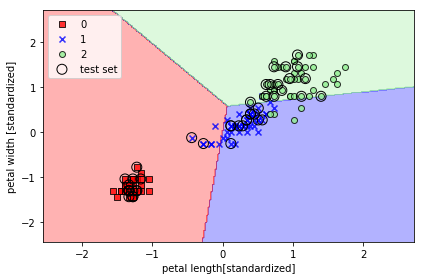

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std,
                     classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

세 개의 붓꽃 클래스는 선형 결정 경계로 완벽하게 분류되지 못함

## 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

### 3.3.1 로지스틱 회귀의 이해와 조건부 확률
* 퍼셉트론 규칙
  * 머신 러닝 분류 알고리즘을 배우기에 간단
  * 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없음
* 로지스틱 회귀
  * 간단한 선형 이진 분류
  * 회귀이지만 회귀가 아니라 "분류"
  * 다중 분류로 확장 가능 (OvR 방식 사용)
  * 결과가 "범주형"
  * 선형 회귀의 값을 시그모이드의 인풋으로 사용하고, 시그모이드의 아웃풋 값을 범주로 사용
  * 시그모이드 함수의 출력: 특정 샘플이 클래스 1에 속할 "확률"  
   
   
   
출처: https://www.youtube.com/watch?v=zASrGSHoqL4

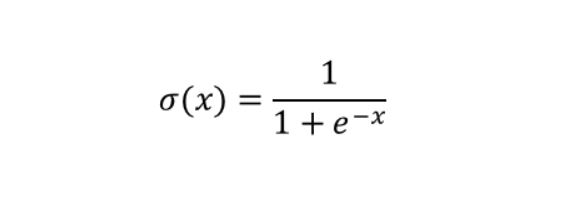

In [24]:
from IPython.display import Image
Image("sigmoid.png")

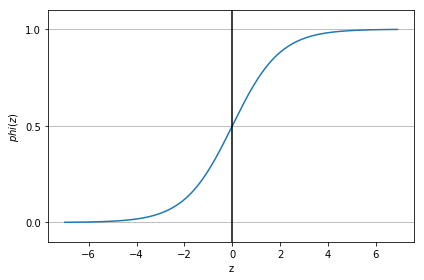

In [25]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$phi (z)$')

# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 3.3.2 로지스틱 비용 함수의 가중치 학습

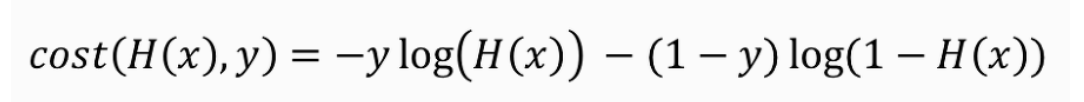

In [26]:
Image("costfunction.png")

H(x)가 시그모이드 함수를 의미

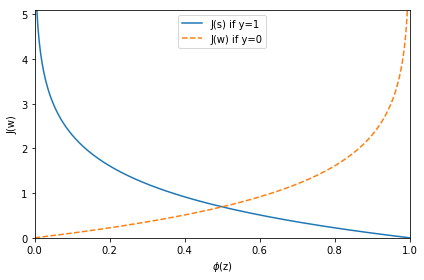

In [27]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(s) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

cf) 간단한 2차원 플롯 그리기
* plt.plot(x, y)
  * 이차원 선그래프 그리기
* ylim[ymin, ymax], xlim[xmin, xmax] : 축의 범위 지정
  * plt.axis[xmin, xmax, ymin, ymax]와 같음
* plt.xlabel(x), plt.ylabel(y) : x축과 y축의 이름
* plt.legend : 범례 위치 설정

### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

로지스틱 회귀의 구현
1. 아달린 구현에서 비용함수 J를 새로운 비용 함수로 바꿈
   (해당 함수로 에포크마다 모든 훈렴 샘플을 분류하는 비용을 계산)
2. 선형 활성화 함수 -> 시그모이드 활성화 함수로 바꿈
3. 임계 함수가 클래스 레이블 -1, 1이 아니고 -> 0, 1을 반환하도록 변경

In [29]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(slef.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            
            #1. 오차 제곱합 대신 로지스틱 비용을 계산
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-ouput))))
            self.cost_.append(cost)
        
        return self
    
    # 최종 입력 계산
    def net_input(self, X):
        return np.dot(X, self.x_[1:]+self.w_[0])
    
    # 2. 로지스틱 시그모이드 활성화 계산
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    # 단3. 위 계단 함수를 사용하여 클래스 레이블을 바환
    def predict(self, X):
        return np.where(self.net_input(X)>=0.5, 1, 0)
        

결정 영역 그리기

### 3.4 서포트 벡터 머신을 사용한 최대 마진 분류

## 3.6 결정 트리 학습

* 의사 결정 나무
* 분류와 회귀 모두 가능한 지도 학습 모델

* 결정 트리 알고리즘의 프로세스<br>
  : 데이터를 가장 잘 구분할 수 있는 질문을 기준으로 분류, 해당 범주에서 또 분류 ...
  * 지나치게 많이 분류할 경우 오버피팅 될 수 있으니 주의
    * 이를 방지하기 위해 틀의 최대 깊이를 제한하는 가지치기 기법 사용
  
출처: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

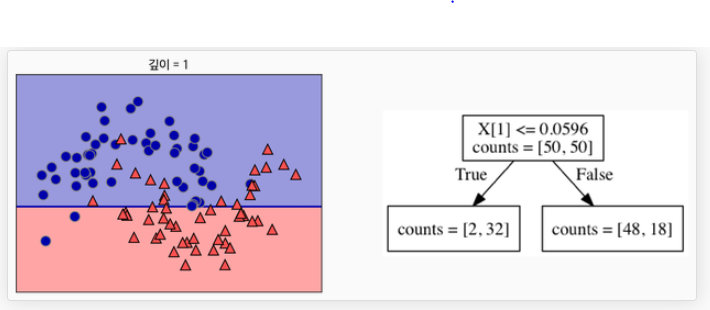

In [30]:
from IPython.display import Image
Image("decisiontree1.png")

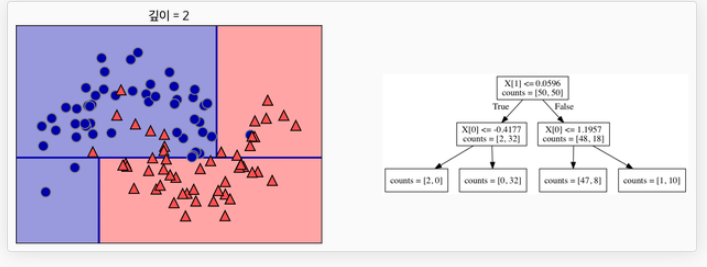

In [31]:
Image("decisiontree2.png")

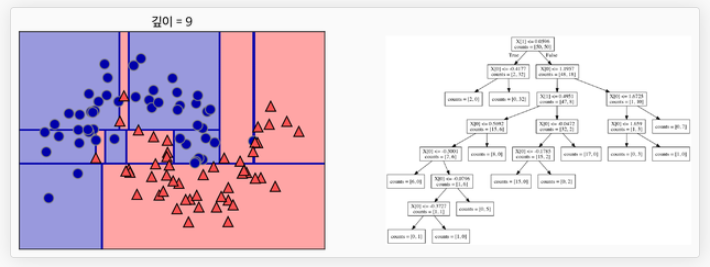

In [32]:
Image("decisiontree3.png")

### 3.6.1 정보 이득 최대화: 자원을 최대로 활용

* 가장 정보가 풍부한 특성으로 노드를 나누기 위함

* 정보이득
  * 의사 결정 학습에서 각 노드에서 분기하기 위한 최적의 질문
  * 자식 노드의 데이터 불순도, 즉 불확실성이 작을수록 정보 이득이 커짐

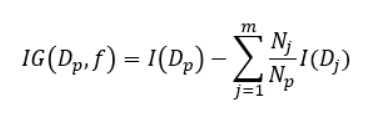

In [33]:
Image("informationGain.png") # 정보 이득 함수

#### 불순도
* 데이터가 제대로 분류되지 않고 섞여 있는 정도
* 불확실성

#### 불순도를 측정하는 방법
* 지니 인덱스
* 엔트로피
* 분류 오류

#### 엔트로피

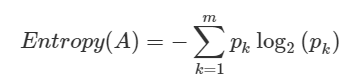

In [34]:
Image("entropy.png")

* Pk : A 영역에 속하는 샘플 중에서 클래스 k에 속하는 샘플 비율
* 클래스 k에 속하는 샘플 비율이 많다 = 잘 분류되었다 = 엔트로피가 낮다

#### 지니 인덱스(지니계수)

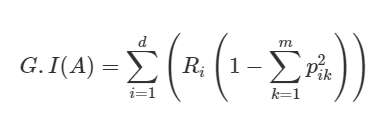

In [35]:
Image("gini.png")

* 잘못 분류될 확률을 최소화
* 엔트로피와 비슷하게, 클래스가 완벽하게 섞여 있을 때 최대

#### 분류 오차

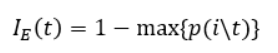

In [36]:
Image("classificationError.png")

* 가지치기에는 좋은 기준이지만 결정 트리 X
  * 이유: 노드의 클래스 확률 변화에 덜 민감하기 때문


_불순도 조건을 바꾸어 트리를 평가하는 것보다 가지치기 수준을 바꾸면서 튜닝하는 것이 훨씬 낫다!_

#### 세 개의 불순도 기준을 비교

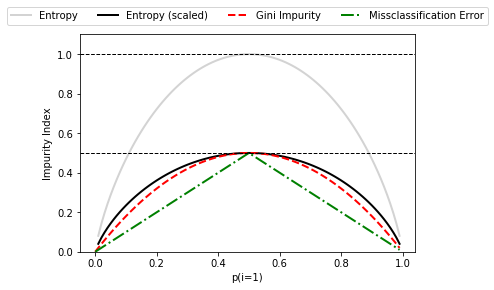

In [37]:
# 불순도 지표 비교
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent] # scaled entropy
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111) # subplot(1, 1, 1)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Missclassification Error'],
                         ['-','-','--','-.'],
                         ['lightgray', 'black', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [38]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [39]:
gini(x)

array([0.    , 0.0198, 0.0392, 0.0582, 0.0768, 0.095 , 0.1128, 0.1302,
       0.1472, 0.1638, 0.18  , 0.1958, 0.2112, 0.2262, 0.2408, 0.255 ,
       0.2688, 0.2822, 0.2952, 0.3078, 0.32  , 0.3318, 0.3432, 0.3542,
       0.3648, 0.375 , 0.3848, 0.3942, 0.4032, 0.4118, 0.42  , 0.4278,
       0.4352, 0.4422, 0.4488, 0.455 , 0.4608, 0.4662, 0.4712, 0.4758,
       0.48  , 0.4838, 0.4872, 0.4902, 0.4928, 0.495 , 0.4968, 0.4982,
       0.4992, 0.4998, 0.5   , 0.4998, 0.4992, 0.4982, 0.4968, 0.495 ,
       0.4928, 0.4902, 0.4872, 0.4838, 0.48  , 0.4758, 0.4712, 0.4662,
       0.4608, 0.455 , 0.4488, 0.4422, 0.4352, 0.4278, 0.42  , 0.4118,
       0.4032, 0.3942, 0.3848, 0.375 , 0.3648, 0.3542, 0.3432, 0.3318,
       0.32  , 0.3078, 0.2952, 0.2822, 0.2688, 0.255 , 0.2408, 0.2262,
       0.2112, 0.1958, 0.18  , 0.1638, 0.1472, 0.1302, 0.1128, 0.095 ,
       0.0768, 0.0582, 0.0392, 0.0198])

In [41]:
ent

[None,
 0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.36592365090022333,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812,
 0.499915958164528,
 0.5293608652873644,
 0.557438185027989,
 0.584238811642856,
 0.6098403047164004,
 0.6343095546405662,
 0.6577047787442195,
 0.6800770457282798,
 0.7014714598838974,
 0.7219280948873623,
 0.7414827399312737,
 0.7601675029619657,
 0.7780113035465377,
 0.7950402793845223,
 0.8112781244591328,
 0.8267463724926178,
 0.8414646362081757,
 0.8554508105601306,
 0.8687212463394045,
 0.8812908992306927,
 0.8931734583778568,
 0.9043814577244939,
 0.9149263727797275,
 0.9248187049730301,
 0.934068055375491,
 0.9426831892554922,
 0.9506720926870659,
 0.9580420222262995,
 0.9647995485050872,
 0.9709505944546686,
 0.976500468757824,
 0.9814538950336535,
 0.9858150371789197,
 0.9895875212220556,
 0.9927744539878083,
 0.9953784388202257,
 0.9974015885677396,
 0.9

### 3.6.2 결정트리 만들기

* 결정 트리는 특성 공간을 사각 격자로 나누기 때문에 복잡한 결정 경계를 만들 수 있음
* 트리가 깊어질수록 결정 경계가 복잡, 과대적합 발생
  * 트리의 최대 깊이 지정

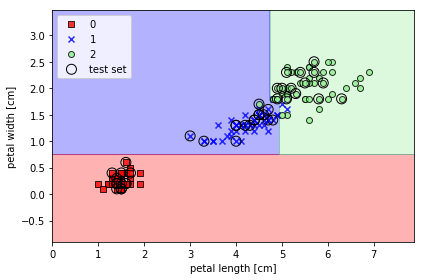

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
"""
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data= export_graphviz(tree, filled=True, rounded=True,
                          class_names=['Setosa', 'Versicolor', 'Virginica'],
                          feature_names=['petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-43-aafb6426db55>, line 10)

### 3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결

* 랜덤 포레스트
  * 여러 개의 의사결정 나무를 만들고, 그들의 다수결로 결과를 결정하는 방법
  * 결정 트리의 앙상블
  * 만드는 방법<br>
    의사결정 나무를 랜덤하게 여러 개 만든다<br>
    (train데이터에서 랜덤으로 선택하여 각 나무의 입력값으로 넣어 학습<br>
    ->각 나무가 서로 다른 데이터로 만들어지기 때문에 랜덤성 생김<br>
    ->오버피팅 방지)
  * 장점
   * 비교적 하이퍼파라미터 튜닝 없이 간단히 쓸 수 있음
   * 대부분 좋은 결과를 가져다 줌
   * 단순하며, calssification과 regression에 모두 쓸 수 있음
  

* 앙상블
  * 여러 머신 러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
  * 종류: 랜덤 포레스트, 그래디언트 부스팅 ...

랜덤 포레스트의 알고리즘
1. n개의 랜덤한 부트스트랩 샘플 뽑음(훈련 세트에서 중복을 허용하면서 랜덤하게 n개의 샘플 선택)
2. 부트스트랩 샘플에서 결정 트리를 학습.<br>
  a. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택<br>
  b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할<br>
3. 단계 1, 2를 k번 반복
4. 각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당(7장)

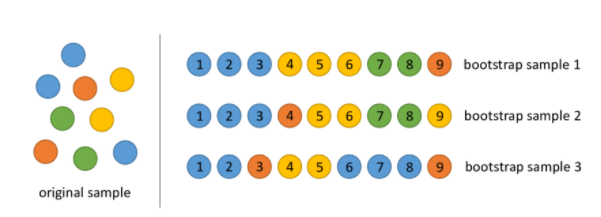

In [44]:
Image("bagging.png")

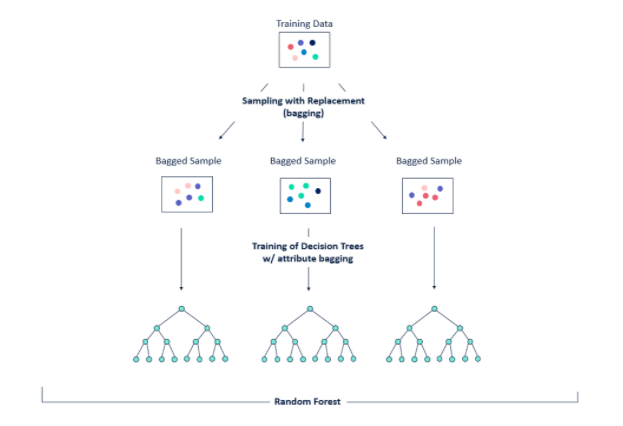

In [103]:
Image("randomForest.png")

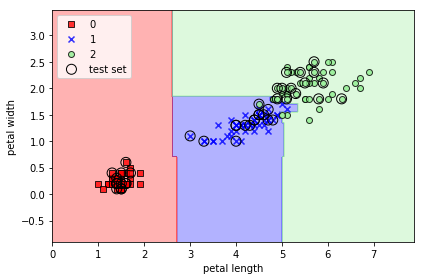

In [104]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### 랜덤 포레스트의 하이퍼 파라미터

RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

* n_estimators:생성할 의사결정 나무 개수
* n_jobs: 사용할 CPU 코어 수
  * n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용
  * n_jobs 매개변수를 코어 개수보다 크게 지정하는 것은 별로 도움x
* max_features: 데이터의 feature을 참조할 비율, 개수
* max_depth: 트리의 깊이
* min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 데이터 수
* min_samples_split: 노드를 분할하기 위한 최소한의 데이터 수

출처: https://lsjsj92.tistory.com/542

랜덤 포레스트의 장점
* 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
* 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
* 다양한 분야에서 좋은 성능을 나타냄

랜덤 포레스트의 단점
* 하이퍼 파라미터가 많아 튜닝을 위한 시간이 많이 소요됨

출처: https://injo.tistory.com/30